# Clustering & Fitting on Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset
data_path = 'Iris.csv'
df = pd.read_csv(data_path)

# Drop unnecessary columns
df.drop(columns=['Id'], inplace=True)

# Exploratory Data Analysis (EDA)
print(df.describe())
print(df.info())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: floa

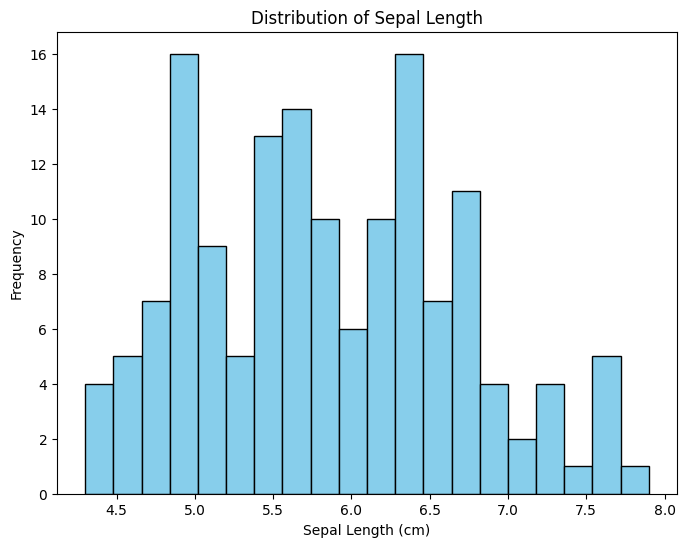

In [3]:
# Plot 1: Histogram of SepalLengthCm
plt.figure(figsize=(8, 6))
df['SepalLengthCm'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


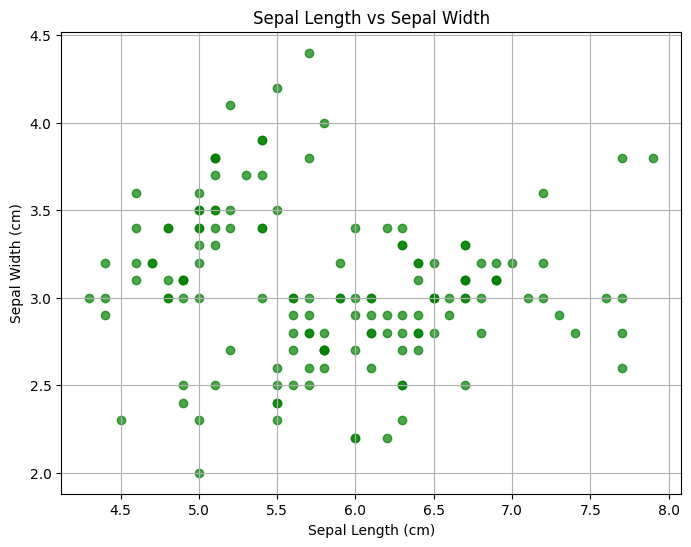

In [4]:
# Plot 2: Scatter plot of SepalLengthCm vs SepalWidthCm
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], alpha=0.7, color='green')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.grid(True)
plt.show()

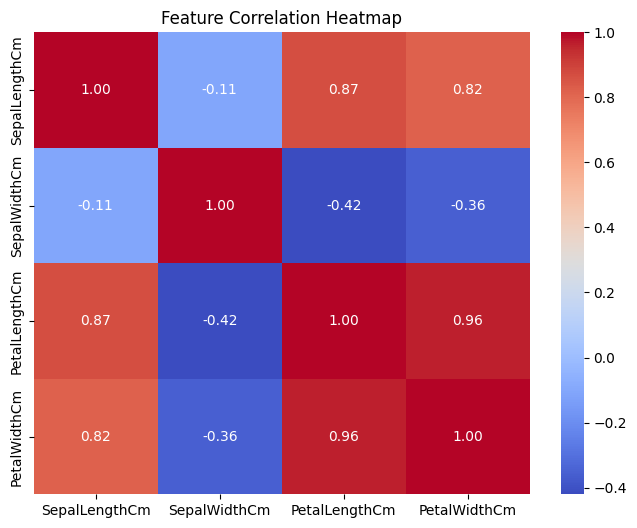

In [5]:
# Plot 3: Heatmap of feature correlations
plt.figure(figsize=(8, 6))
corr = df.drop(columns=['Species']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

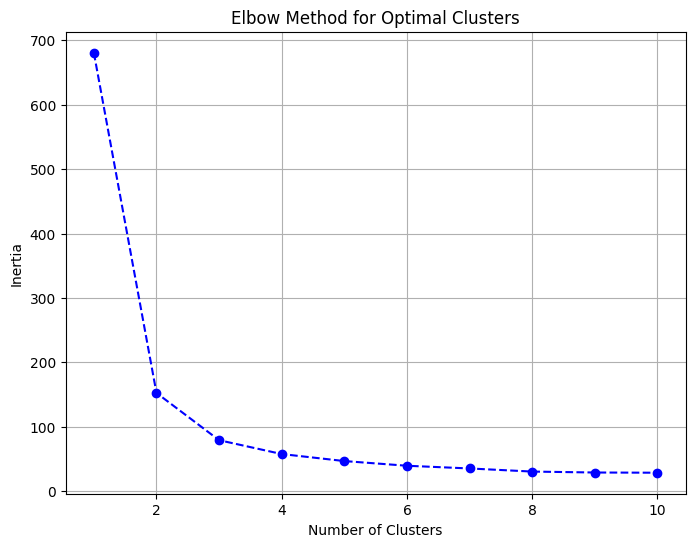

In [6]:
# K-Means Clustering
features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# finding clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot 4: Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

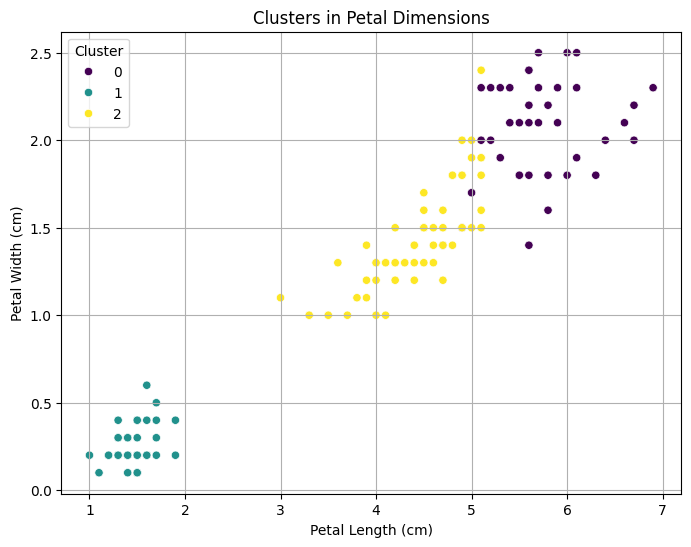

In [7]:
# applying K-Means at k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
df['Cluster'] = kmeans.labels_

# Visualizing clusters in PetalLengthCm vs PetalWidthCm
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', palette='viridis')
plt.title('Clusters in Petal Dimensions')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

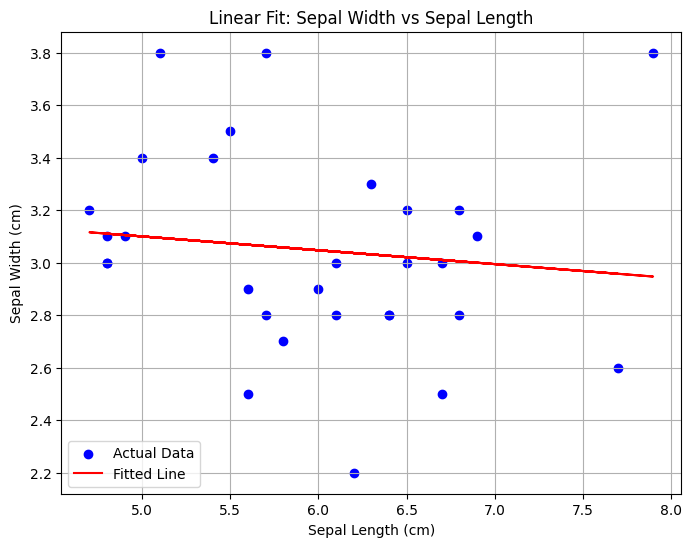

Linear Regression Coefficients: -0.0526653589497265 (Slope)
Linear Regression Intercept: 3.3634418476987857 (Intercept)


In [8]:
# Line Fitting
# predicting value of SepalWidthCm on the base of SepalLengthCm
X = df[['SepalLengthCm']]
y = df['SepalWidthCm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fiting model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicted value
y_pred = regressor.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Fitted Line')
plt.title('Linear Fit: Sepal Width vs Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

# Model summary
print(f"Linear Regression Coefficients: {regressor.coef_[0]} (Slope)")
print(f"Linear Regression Intercept: {regressor.intercept_} (Intercept)")
